#### IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [18]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [20]:
df.shape
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [24]:
del df['Product_Category_3']
del df['Product_Category_2']
df.shape

(537577, 10)

### ANALYSING COLUMNS

In [28]:
#nunique for the number of unique users
df['User_ID'].nunique()

5891

In [41]:
for column in list(df.columns):
    print(f"{column} : {df[column].nunique()}")
    if df[column].nunique()<11:
        print(df[column].unique())

User_ID : 5891
Product_ID : 3623
Gender : 2
['F' 'M']
Age : 7
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation : 21
City_Category : 3
['A' 'C' 'B']
Stay_In_Current_City_Years : 5
['2' '4+' '3' '1' '0']
Marital_Status : 2
[0 1]
Product_Category_1 : 18
Purchase : 17959


#### ANALYZING GENDER 

<AxesSubplot:ylabel='RATIO'>

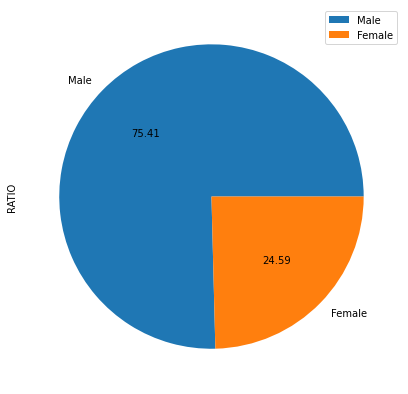

In [53]:
gender = pd.DataFrame({'RATIO':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index = ['Male','Female'])

gender.plot.pie(y='RATIO',figsize=(7,7),autopct="%.2f")

<AxesSubplot:ylabel='Purchase'>

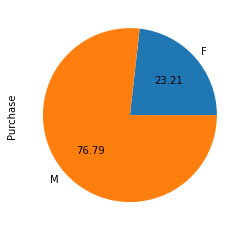

In [61]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct="%.2F")

<AxesSubplot:ylabel='Purchase'>

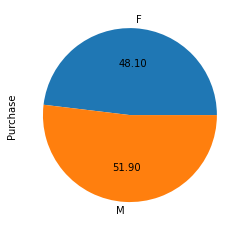

In [64]:
df.groupby('Gender').mean()['Purchase'].plot(kind='pie',autopct="%.2F")

#### ANALYZING AGE AND MARITAL STATUS

<AxesSubplot:title={'center':'Purchase Distribution by AGE'}, xlabel='Age'>

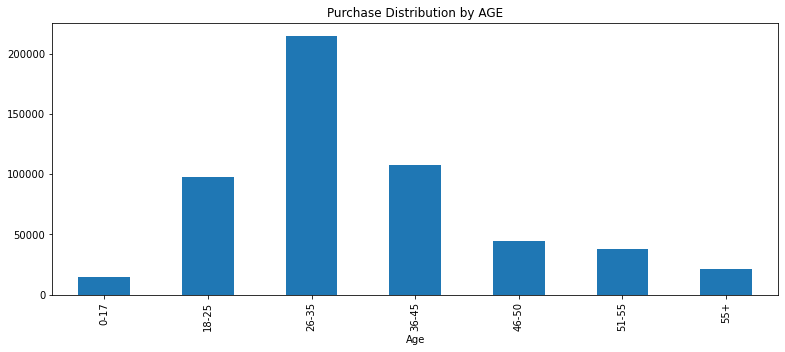

In [74]:
df.groupby("Age").size().plot(kind="bar",figsize=(13,5),title="Purchase Distribution by AGE")

<AxesSubplot:xlabel='Age'>

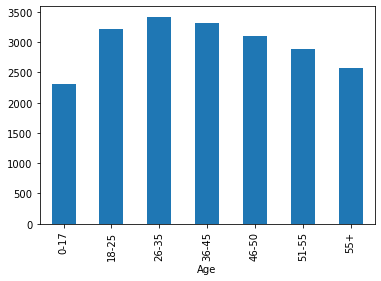

In [80]:
df.groupby('Age')['Product_ID'].nunique().plot(kind="bar")

<AxesSubplot:xlabel='Age'>

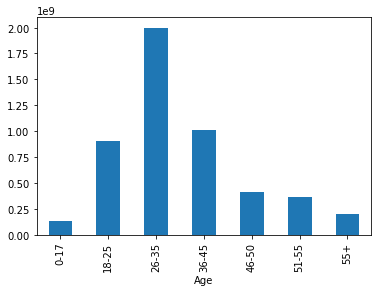

In [84]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar')